In [2]:
import os
import json
import matplotlib.pyplot as plt
import tqdm
import pprint
import numpy as np
import pandas as pd
from collections import defaultdict
import pandas as pd

In [6]:
filepath = "./../non_packed_combined_result.json"
length_filepath = "./../non_packed_length_result.json"
with open(filepath, 'r') as f:
    json_data = json.load(f)
print(len(json_data))
#print(json_data.keys())
with open(length_filepath, 'r') as f:
    length_data = json.load(f)
print(len(length_data))
#print(length_data.keys())


231
66


In [7]:
attributes = [(key, json_data[key]['attribute']) for key in json_data.keys()]
#extractiveness 
extractiveness_results = [(key,json_data[key]) for key in json_data.keys() if json_data[key]['attribute'] == 'extractiveness']
print(len(extractiveness_results))
topic_results = [(key,json_data[key]) for key in json_data.keys() if json_data[key]['attribute'] == 'topic']
print(len(topic_results))
length_results = [(key,length_data[key]) for key in length_data.keys() if json_data[key]['attribute'] == 'length']
print(len(length_results))
specificity_results = [(key,json_data[key]) for key in json_data.keys() if json_data[key]['attribute'] == 'specificity']
print(len(specificity_results))

66
33
66
66


### EXTRACTIVITY

In [14]:
#max_val = 4000 for extractiveness
def get_lr_and_checkpoint(path, max_val = 4400):
    basename = os.path.basename(path)
    #given extractiveness_extractiveness_0.0001_checkpoint-1000_extractiveness.json
    # return (0.0001, 1000)

    lr = float(basename.split('_')[2])
    if "checkpoint" in basename:
        checkpoint = int(basename.split('_')[3].split('-')[1])
    else:
        checkpoint = max_val
    return lr, checkpoint
def is_strictly_increasing(lst):
    for i in range(len(lst) - 1):
        if lst[i] >= lst[i + 1]:
            return False
    return True

In [20]:
ext_results = []
for res in extractiveness_results:
    name, result = res
    lr, checkpoint = get_lr_and_checkpoint(name)
    ext_results.append((name, lr, checkpoint, result))
len_results = []
for res in length_results:
    name, result = res
    lr, checkpoint = get_lr_and_checkpoint(name)
    len_results.append((name, lr, checkpoint, result))
top_results = []
for res in topic_results:
    name, result = res
    lr, checkpoint = get_lr_and_checkpoint(name, max_val = 2400)
    top_results.append((name, lr, checkpoint, result))
spec_results = []
for res in specificity_results:
    name, result = res
    lr, checkpoint = get_lr_and_checkpoint(name)
    spec_results.append((name, lr, checkpoint, result))
print(len(ext_results))
print(len(len_results))
print(len(top_results))
print(len(spec_results))

66
66
33
66


In [22]:
pprint.pprint(ext_results[0][3])
pprint.pprint(len_results[0][3])
pprint.pprint(top_results[0][3])
pprint.pprint(spec_results[0][3])


{'attribute': 'extractiveness',
 'result': {'fully': {'cer': 0.6034132229809378,
                      'gold_f_score': 0.7742987500000001,
                      'num_examples': 36,
                      'prediction_coverage': 0.7998782947606188,
                      'prediction_density': 3.7652142605028516,
                      'prediction_f_score': 0.35627499999999995,
                      'prediction_overlap': 0.42351784409330734,
                      'reference_coverage': 0.9460150114205875,
                      'reference_density': 9.769485766317233,
                      'reference_overlap': 0.7703843924108396},
            'high': {'cer': 0.7520477870572535,
                     'gold_f_score': 0.4607803658536585,
                     'num_examples': 41,
                     'prediction_coverage': 0.8401100718177811,
                     'prediction_density': 3.538216095570453,
                     'prediction_f_score': 0.34900609756097556,
                     'prediction_o

# SPECIFICITY ANALYSIS

7
0.0001 1000
0.0001 1600
0.0001 1800
0.0001 3800
0.0006 2600
0.0006 3400
1e-05 2400


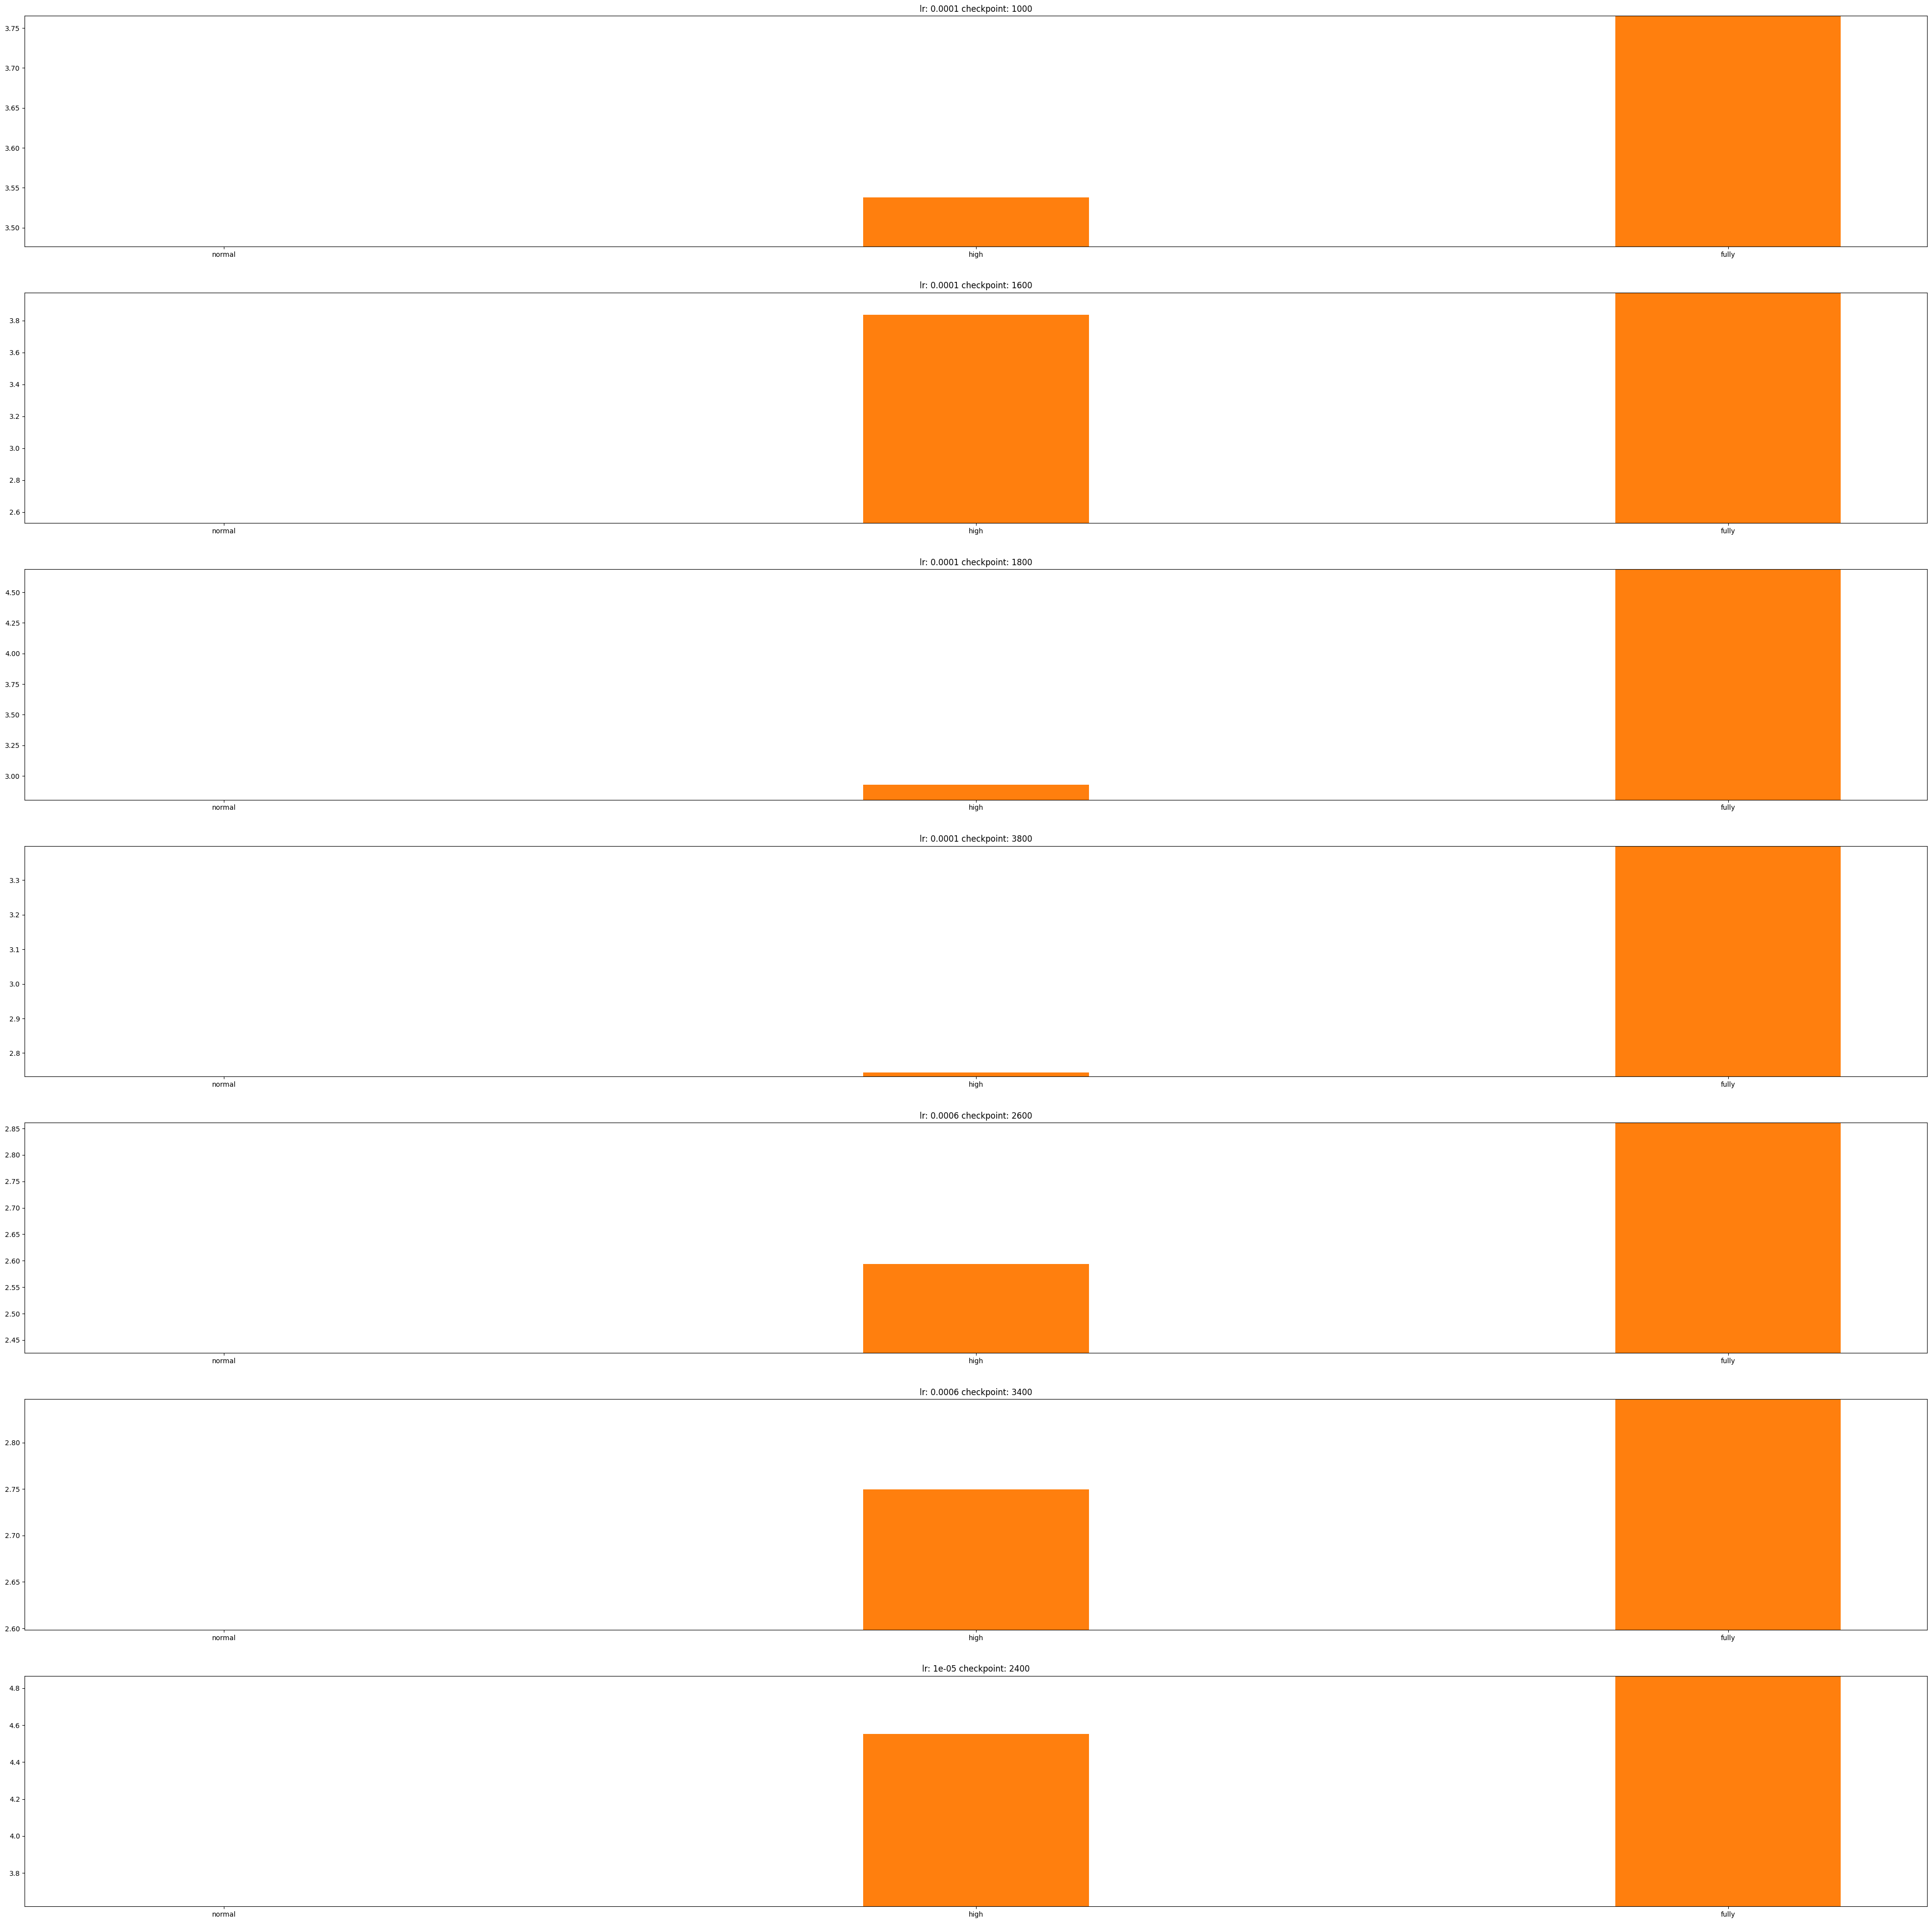

In [26]:
fig = plt.figure(figsize = (50,50))
control_metric = 'prediction_density'
reference_metric = 'reference_density'


xs = []
ys = []
config = []
for index, res in enumerate(ext_results):
    name, lr, checkpoint, result = res
    x = []
    y = []
    for index,control_value in enumerate(['normal','high','fully']):
        prediction_density = result['result'][control_value][control_metric]
        x.append(control_value)
        y.append(prediction_density)
    if is_strictly_increasing(y):
        xs.append(x)
        ys.append(y)
        config.append([name, lr, checkpoint, result])
num_bar_graph = len(xs)
print(num_bar_graph)
for index in range(num_bar_graph):
    fig.add_subplot(num_bar_graph, 1, index + 1)
    x = xs[index]
    y = ys[index]
    lr = config[index][1]
    checkpoint = config[index][2]
    print(lr, checkpoint)
    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))



        #check if y is ascending
        #if not skip

        #width of the bar graph

    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))

    plt.title(f"lr: {lr} checkpoint: {checkpoint}")


2
0.0006 2600
1e-05 2400


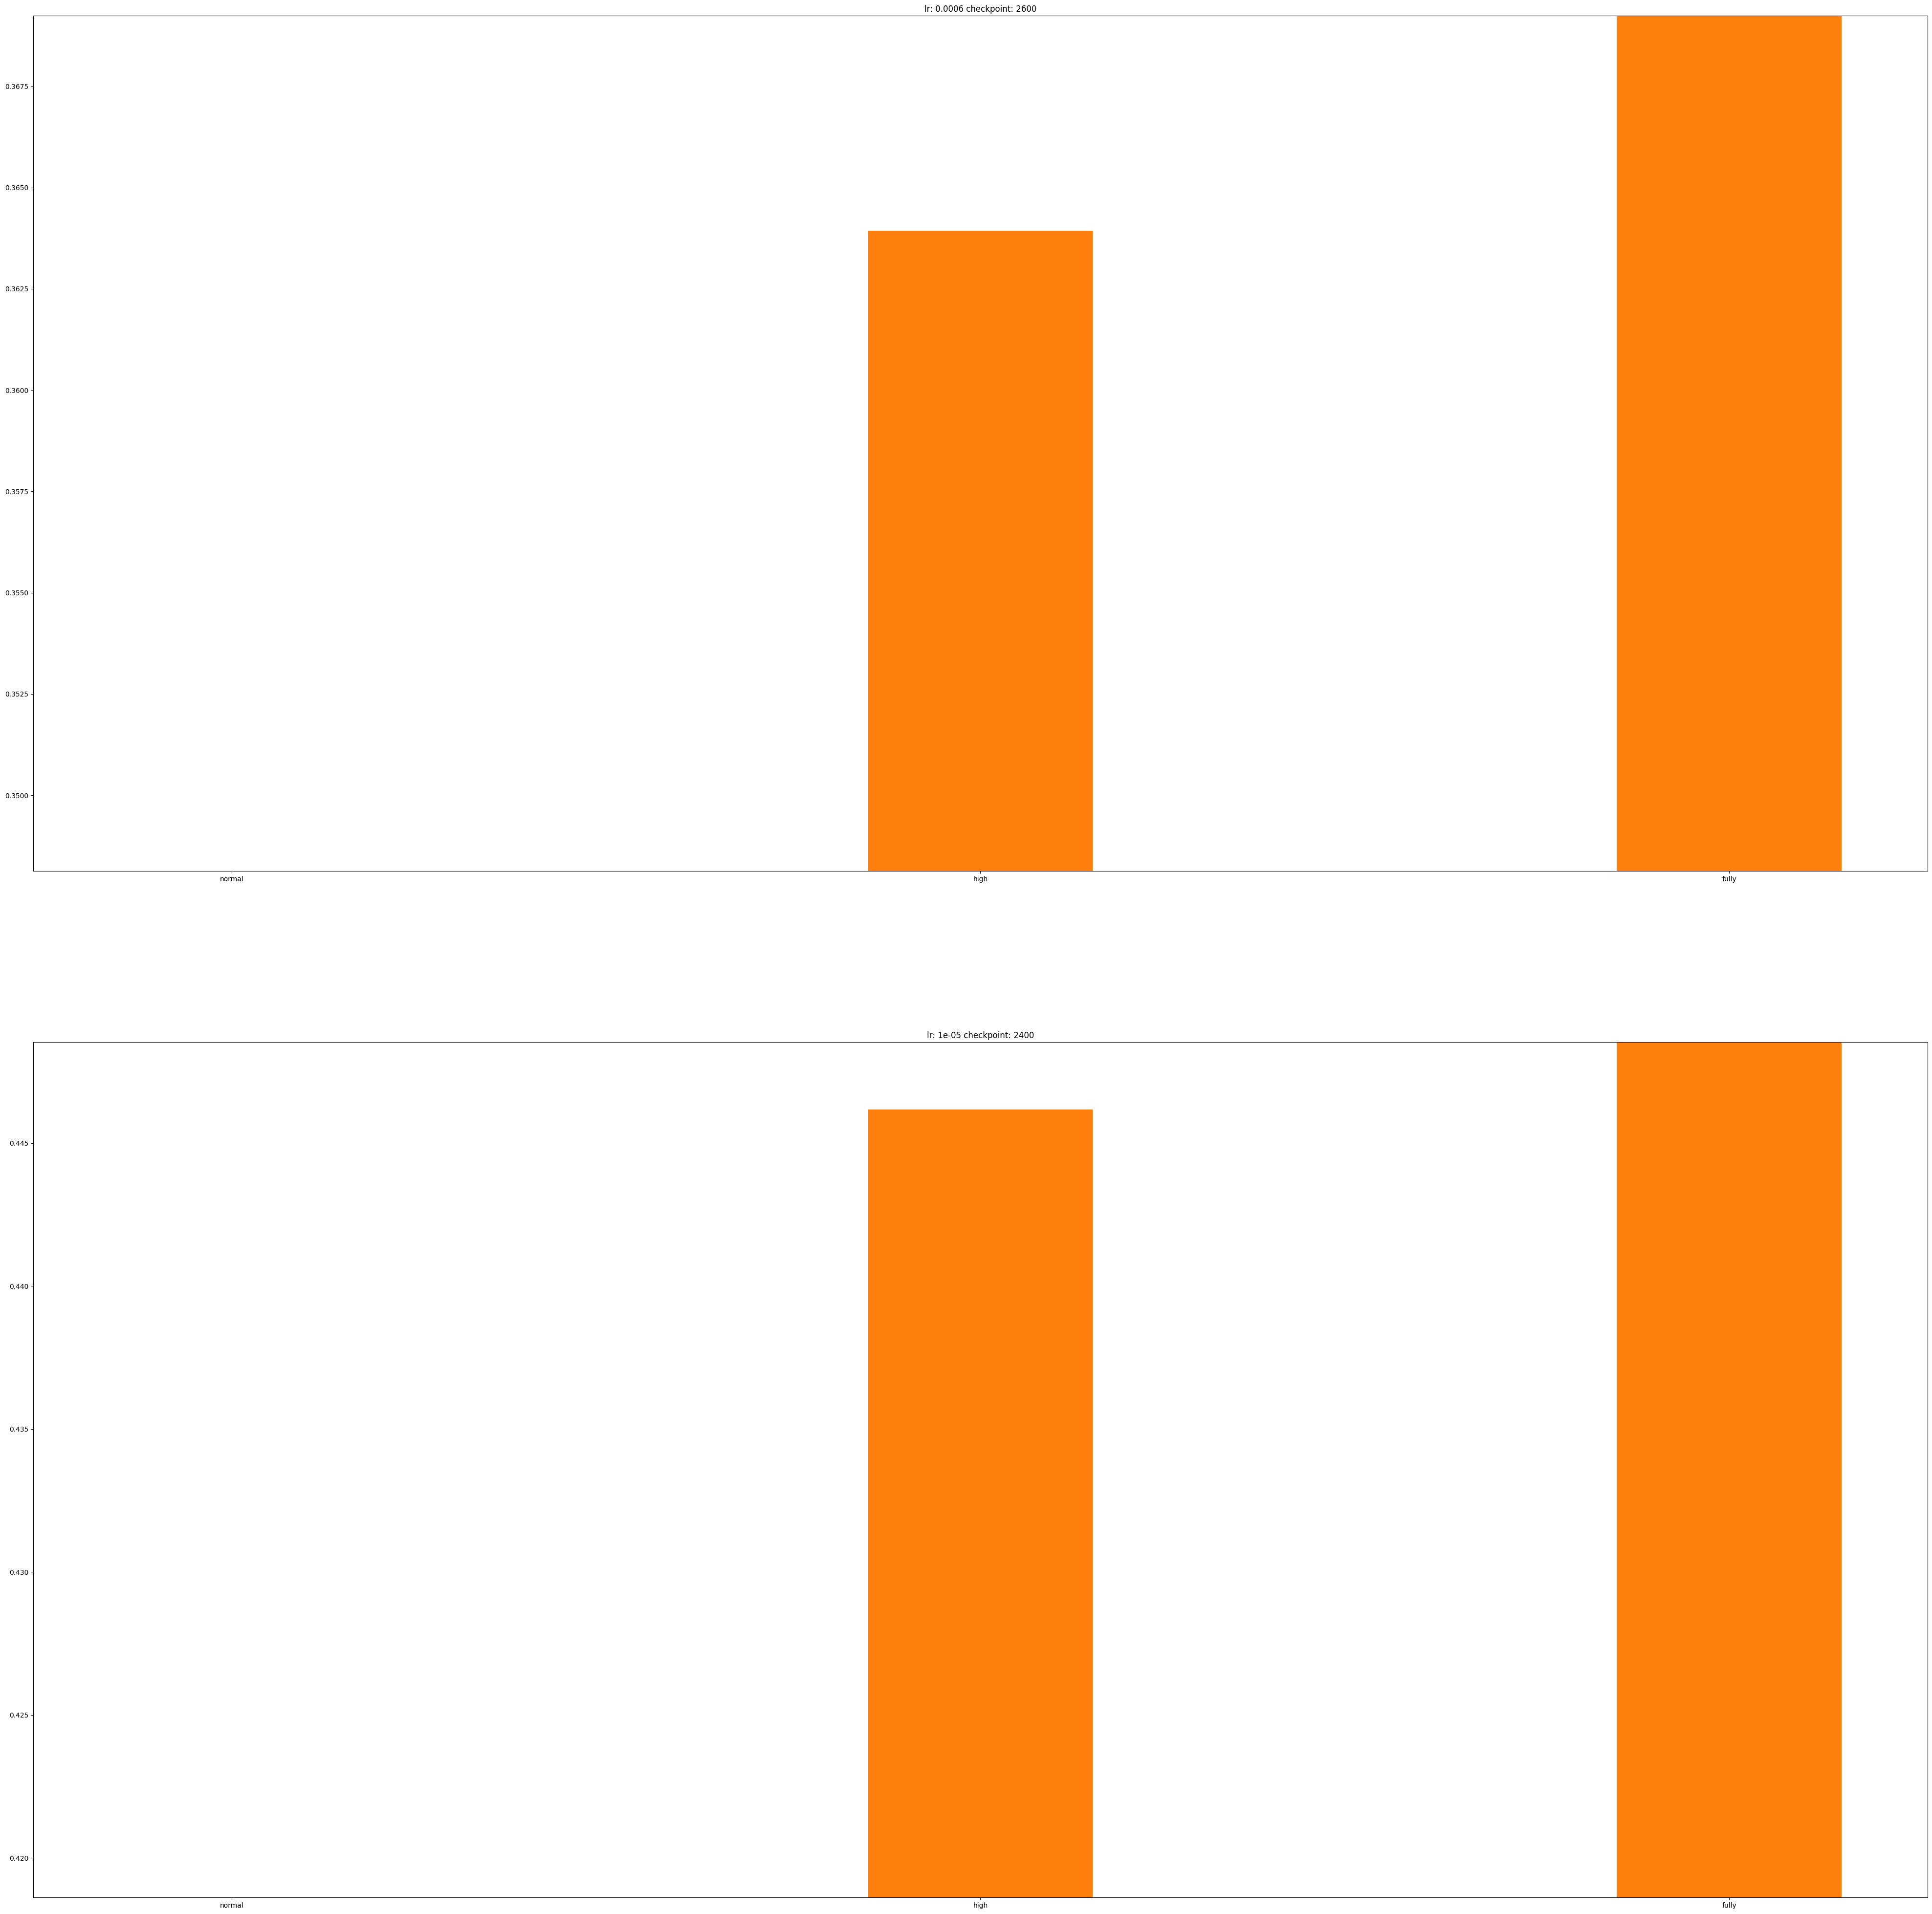

In [28]:
fig = plt.figure(figsize = (50,50))
control_metric = 'prediction_overlap'
reference_metric = 'reference_overlap'


xs = []
ys = []
config = []
for index, res in enumerate(ext_results):
    name, lr, checkpoint, result = res
    x = []
    y = []
    for index,control_value in enumerate(['normal','high','fully']):
        prediction_density = result['result'][control_value][control_metric]
        x.append(control_value)
        y.append(prediction_density)
    if is_strictly_increasing(y):
        xs.append(x)
        ys.append(y)
        config.append([name, lr, checkpoint, result])
num_bar_graph = len(xs)
print(num_bar_graph)
for index in range(num_bar_graph):
    fig.add_subplot(num_bar_graph, 1, index + 1)
    x = xs[index]
    y = ys[index]
    lr = config[index][1]
    checkpoint = config[index][2]
    print(lr, checkpoint)
    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))



        #check if y is ascending
        #if not skip

        #width of the bar graph

    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))

    plt.title(f"lr: {lr} checkpoint: {checkpoint}")


3
0.0001 800
0.0006 2600
1e-05 2400


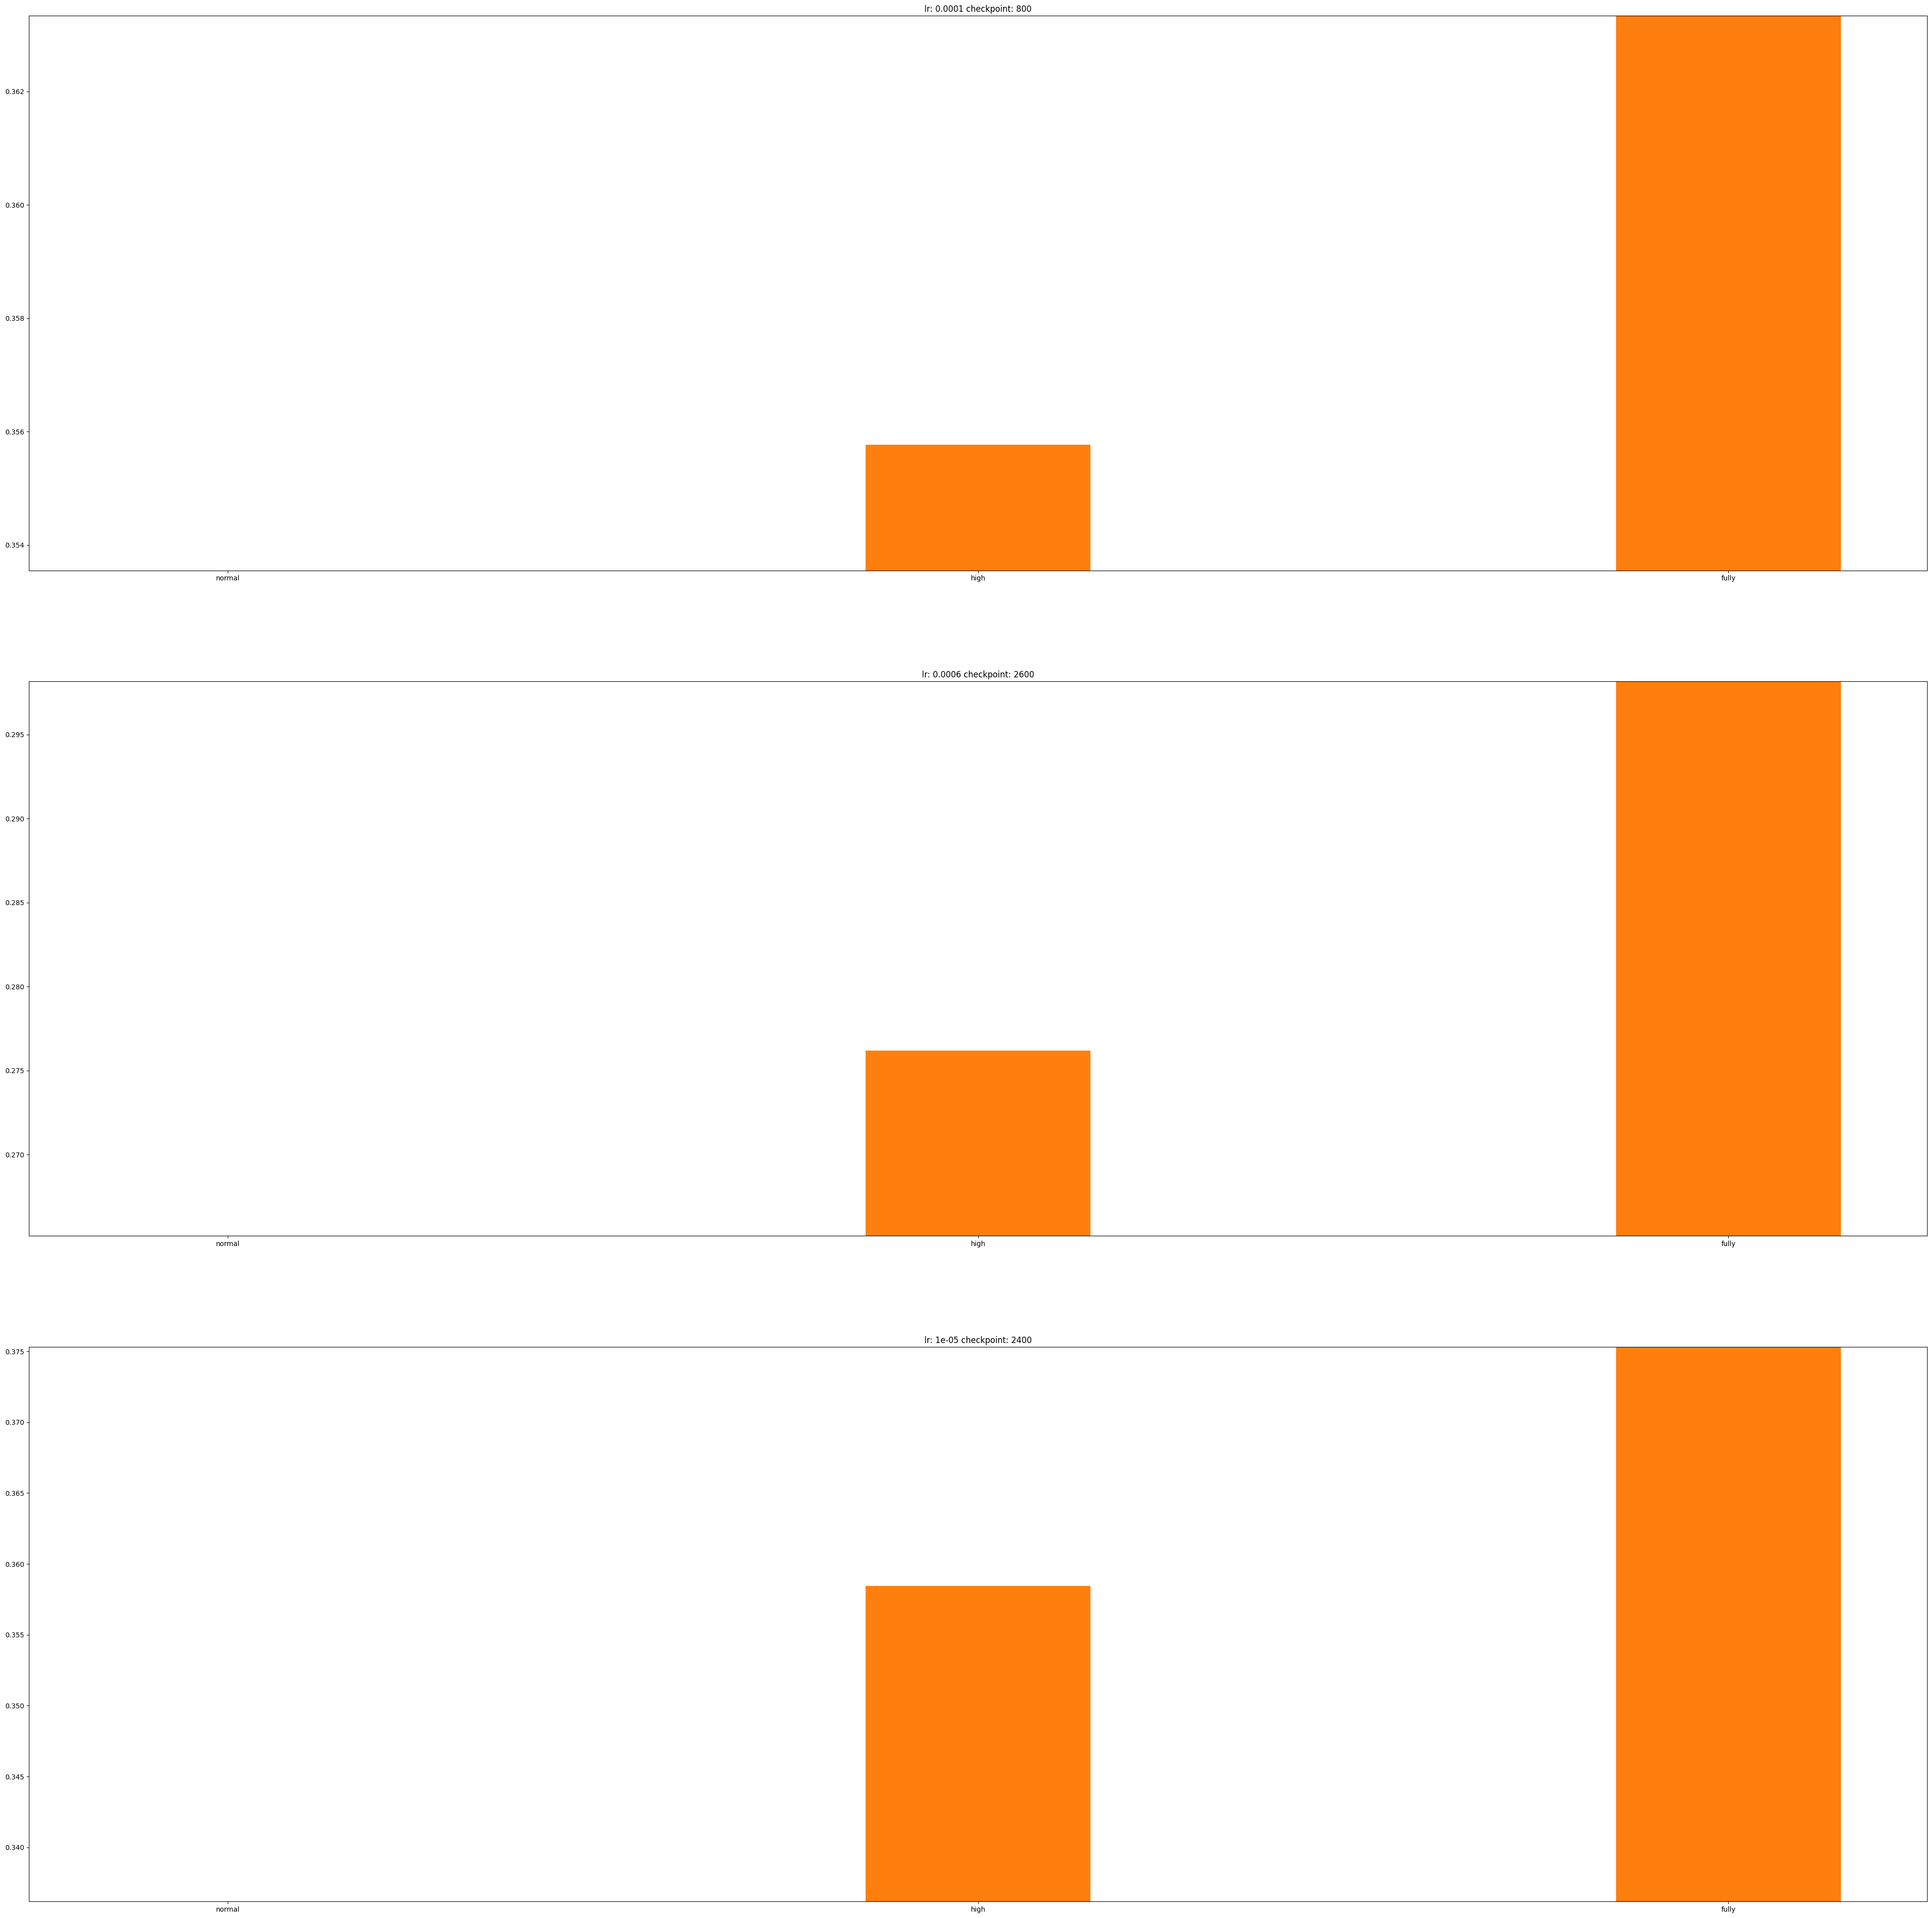

In [29]:
#extractiveness 
#0.0006 2600
#1e-05 2400
#0.0006 2600
#1e-05 2400
#higher f_score, higher extractiveness
fig = plt.figure(figsize = (50,50))
control_metric = 'prediction_f_score'
reference_metric = 'gold_f_score'


xs = []
ys = []
config = []
for index, res in enumerate(ext_results):
    name, lr, checkpoint, result = res
    x = []
    y = []
    for index,control_value in enumerate(['normal','high','fully']):
        prediction_density = result['result'][control_value][control_metric]
        x.append(control_value)
        y.append(prediction_density)
    if is_strictly_increasing(y):
        xs.append(x)
        ys.append(y)
        config.append([name, lr, checkpoint, result])
num_bar_graph = len(xs)
print(num_bar_graph)
for index in range(num_bar_graph):
    fig.add_subplot(num_bar_graph, 1, index + 1)
    x = xs[index]
    y = ys[index]
    lr = config[index][1]
    checkpoint = config[index][2]
    print(lr, checkpoint)
    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))



        #check if y is ascending
        #if not skip

        #width of the bar graph

    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))

    plt.title(f"lr: {lr} checkpoint: {checkpoint}")


In [ ]:
#for extractiveness 
# save 0.0006 2600
# 1e-05 2400
# delete the rest 


# LENGTH ANALYSIS

In [24]:
pprint.pprint(len_results[0][3])

{'attribute': 'length',
 'result': {'long': {'cer': 0.616524015204307,
                     'num_examples': 135,
                     'prediction_compression_ratio': 0.05959405276332598,
                     'prediction_summary_length': 41.48888888888889,
                     'reference_compression_ratio': 0.12471463538151979,
                     'reference_summary_length': 90.66666666666667},
            'normal': {'cer': 0.8336652918624622,
                       'num_examples': 298,
                       'prediction_compression_ratio': 0.05273312388125499,
                       'prediction_summary_length': 40.74496644295302,
                       'reference_compression_ratio': 0.06021797495584893,
                       'reference_summary_length': 45.104026845637584},
            'overall_cer': 0.7685228363184587,
            'short': {'cer': 0.7776748123374448,
                      'num_examples': 121,
                      'prediction_compression_ratio': 0.054941669084610914,

8
0.0001 1000
0.0001 1200
0.0001 1400
0.0001 200
0.0001 3400
0.0001 4200
1e-05 1200
1e-05 2000


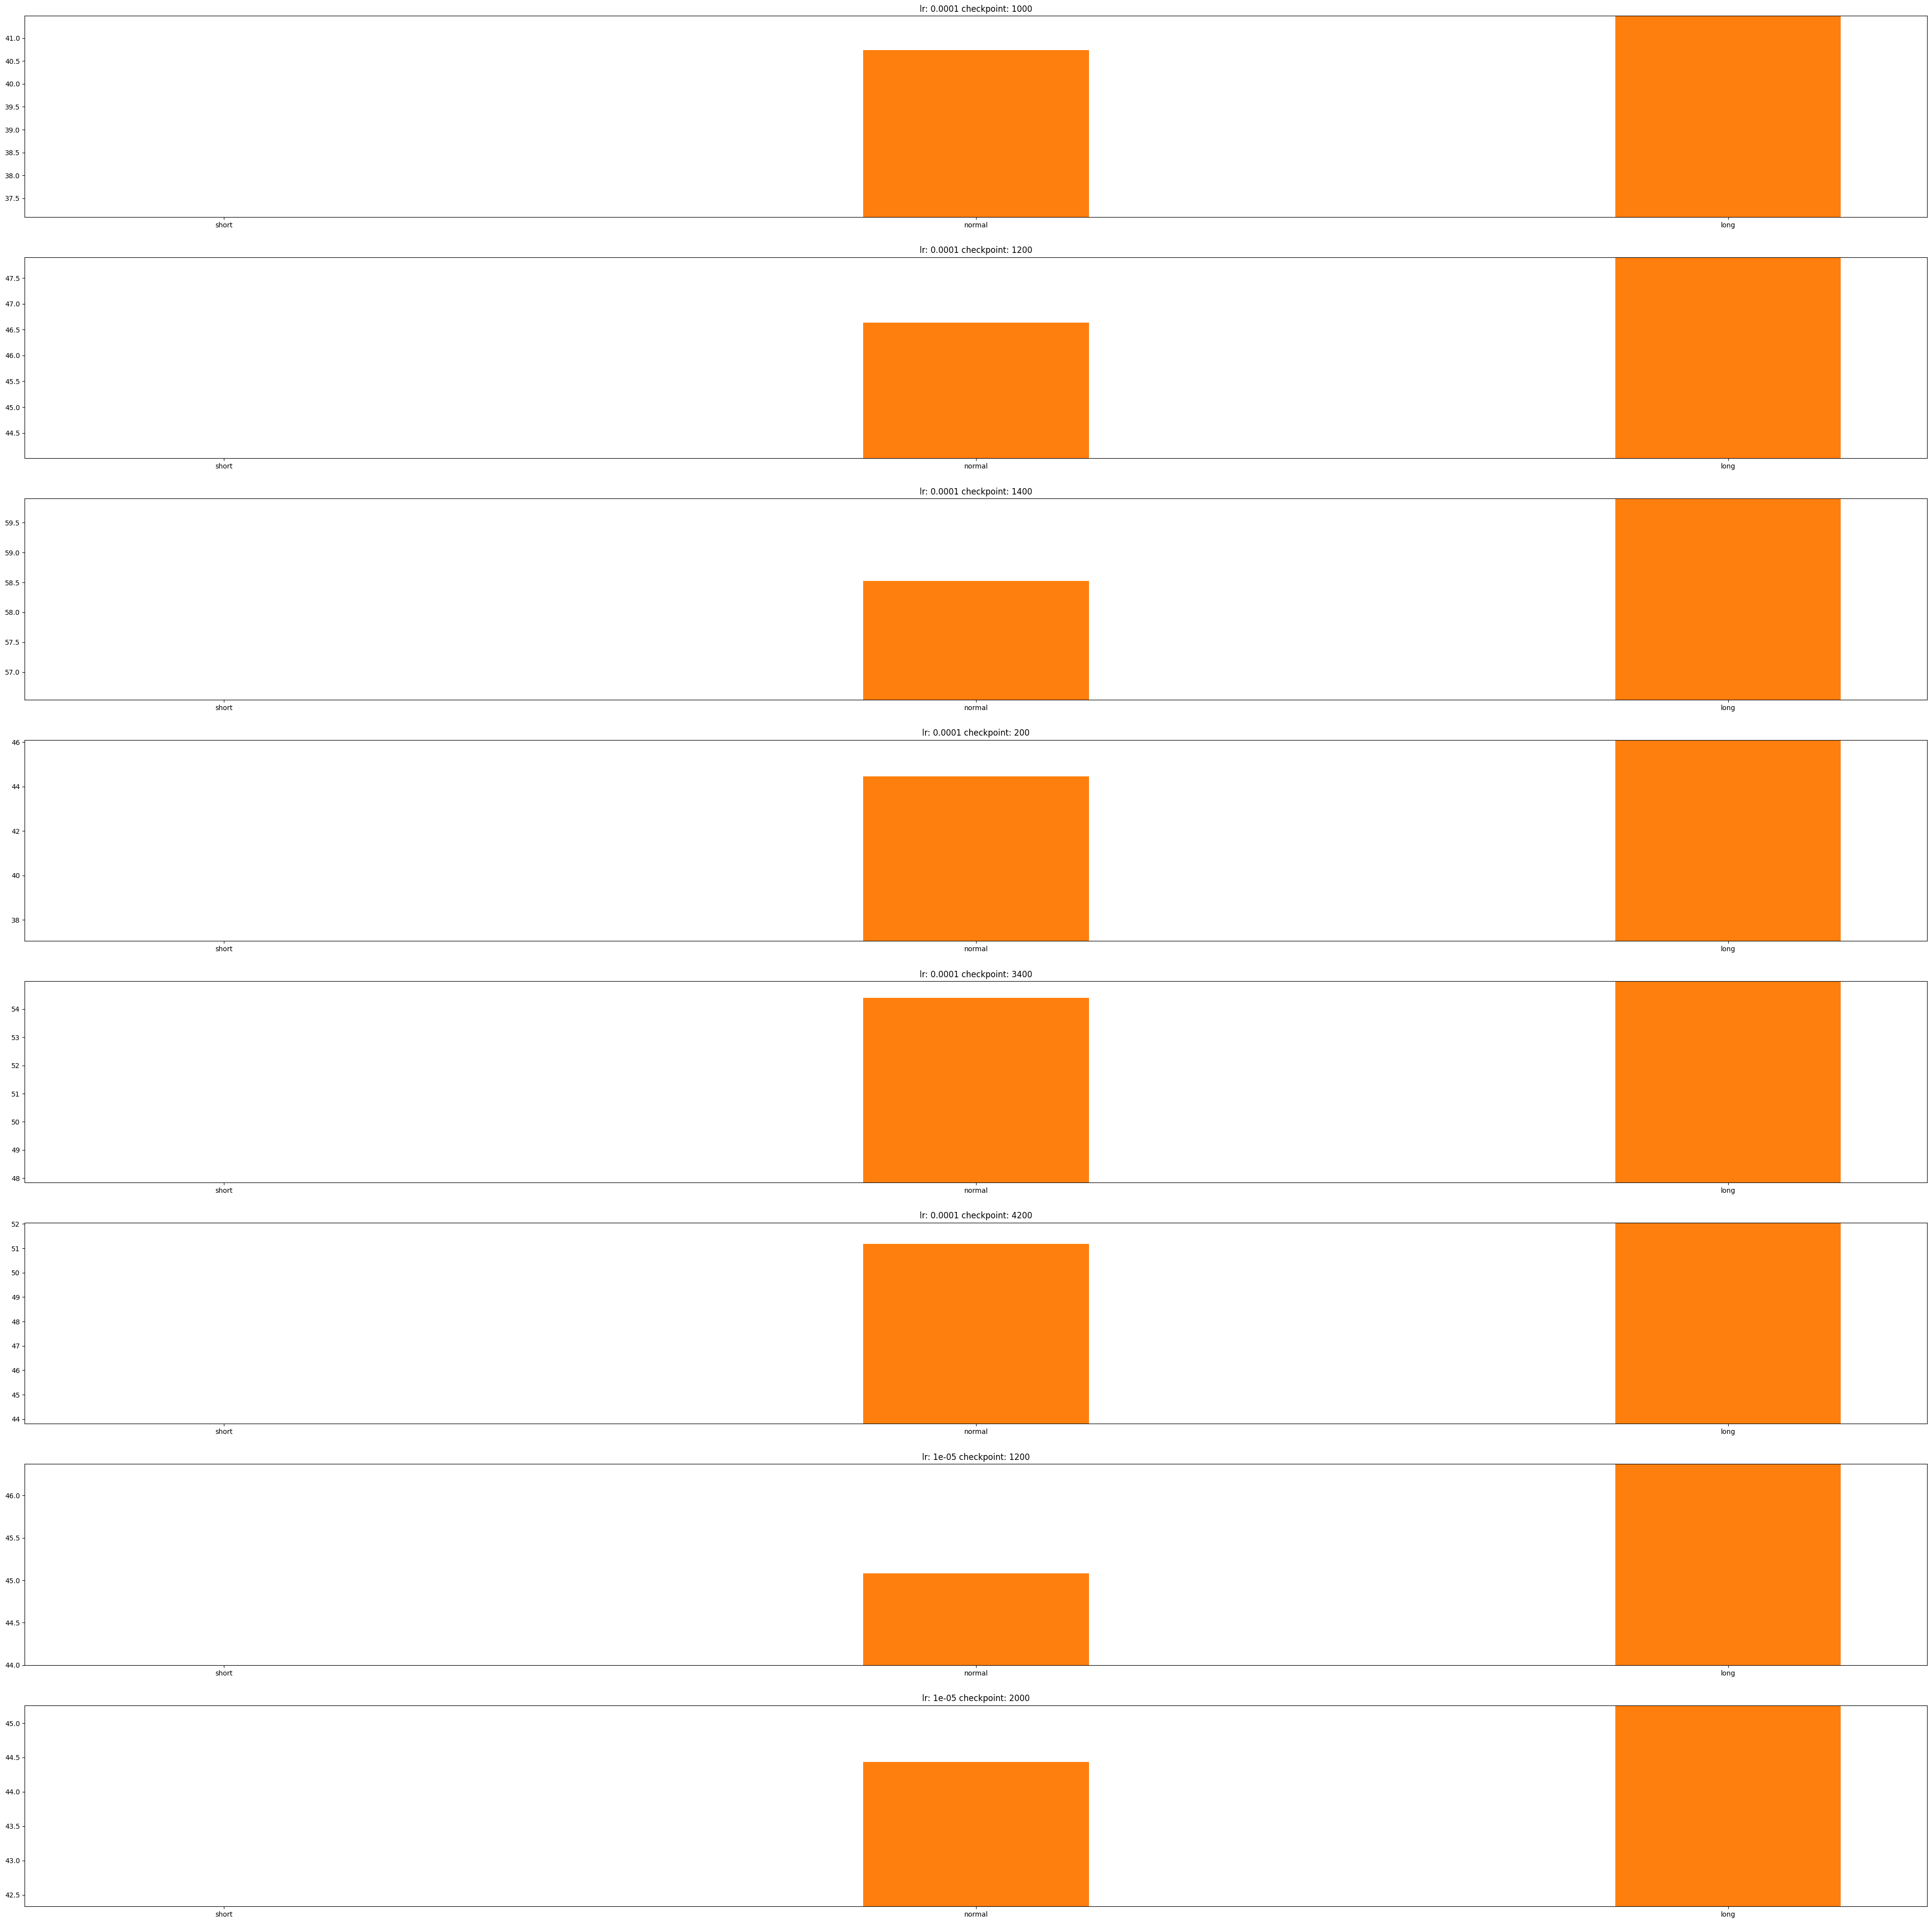

In [27]:
fig = plt.figure(figsize = (50,50))
control_metric = 'prediction_summary_length'
reference_metric = 'reference_summary_length'


xs = []
ys = []
config = []
for index, res in enumerate(len_results):
    name, lr, checkpoint, result = res
    x = []
    y = []
    for index,control_value in enumerate(['short','normal','long']):
        prediction_density = result['result'][control_value][control_metric]
        x.append(control_value)
        y.append(prediction_density)
    if is_strictly_increasing(y):
        xs.append(x)
        ys.append(y)
        config.append([name, lr, checkpoint, result])
num_bar_graph = len(xs)
print(num_bar_graph)
for index in range(num_bar_graph):
    fig.add_subplot(num_bar_graph, 1, index + 1)
    x = xs[index]
    y = ys[index]
    lr = config[index][1]
    checkpoint = config[index][2]
    print(lr, checkpoint)
    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))



        #check if y is ascending
        #if not skip

        #width of the bar graph

    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))

    plt.title(f"lr: {lr} checkpoint: {checkpoint}")


17
0.0001 1800
0.0001 200
0.0001 2600
0.0001 3400
0.0001 4200
0.0001 800
0.0006 1600
0.0006 1800
0.0006 2400
0.0006 2800
0.0006 4200
1e-05 1600
1e-05 1800
1e-05 2800
1e-05 3000
1e-05 3400
1e-05 3800


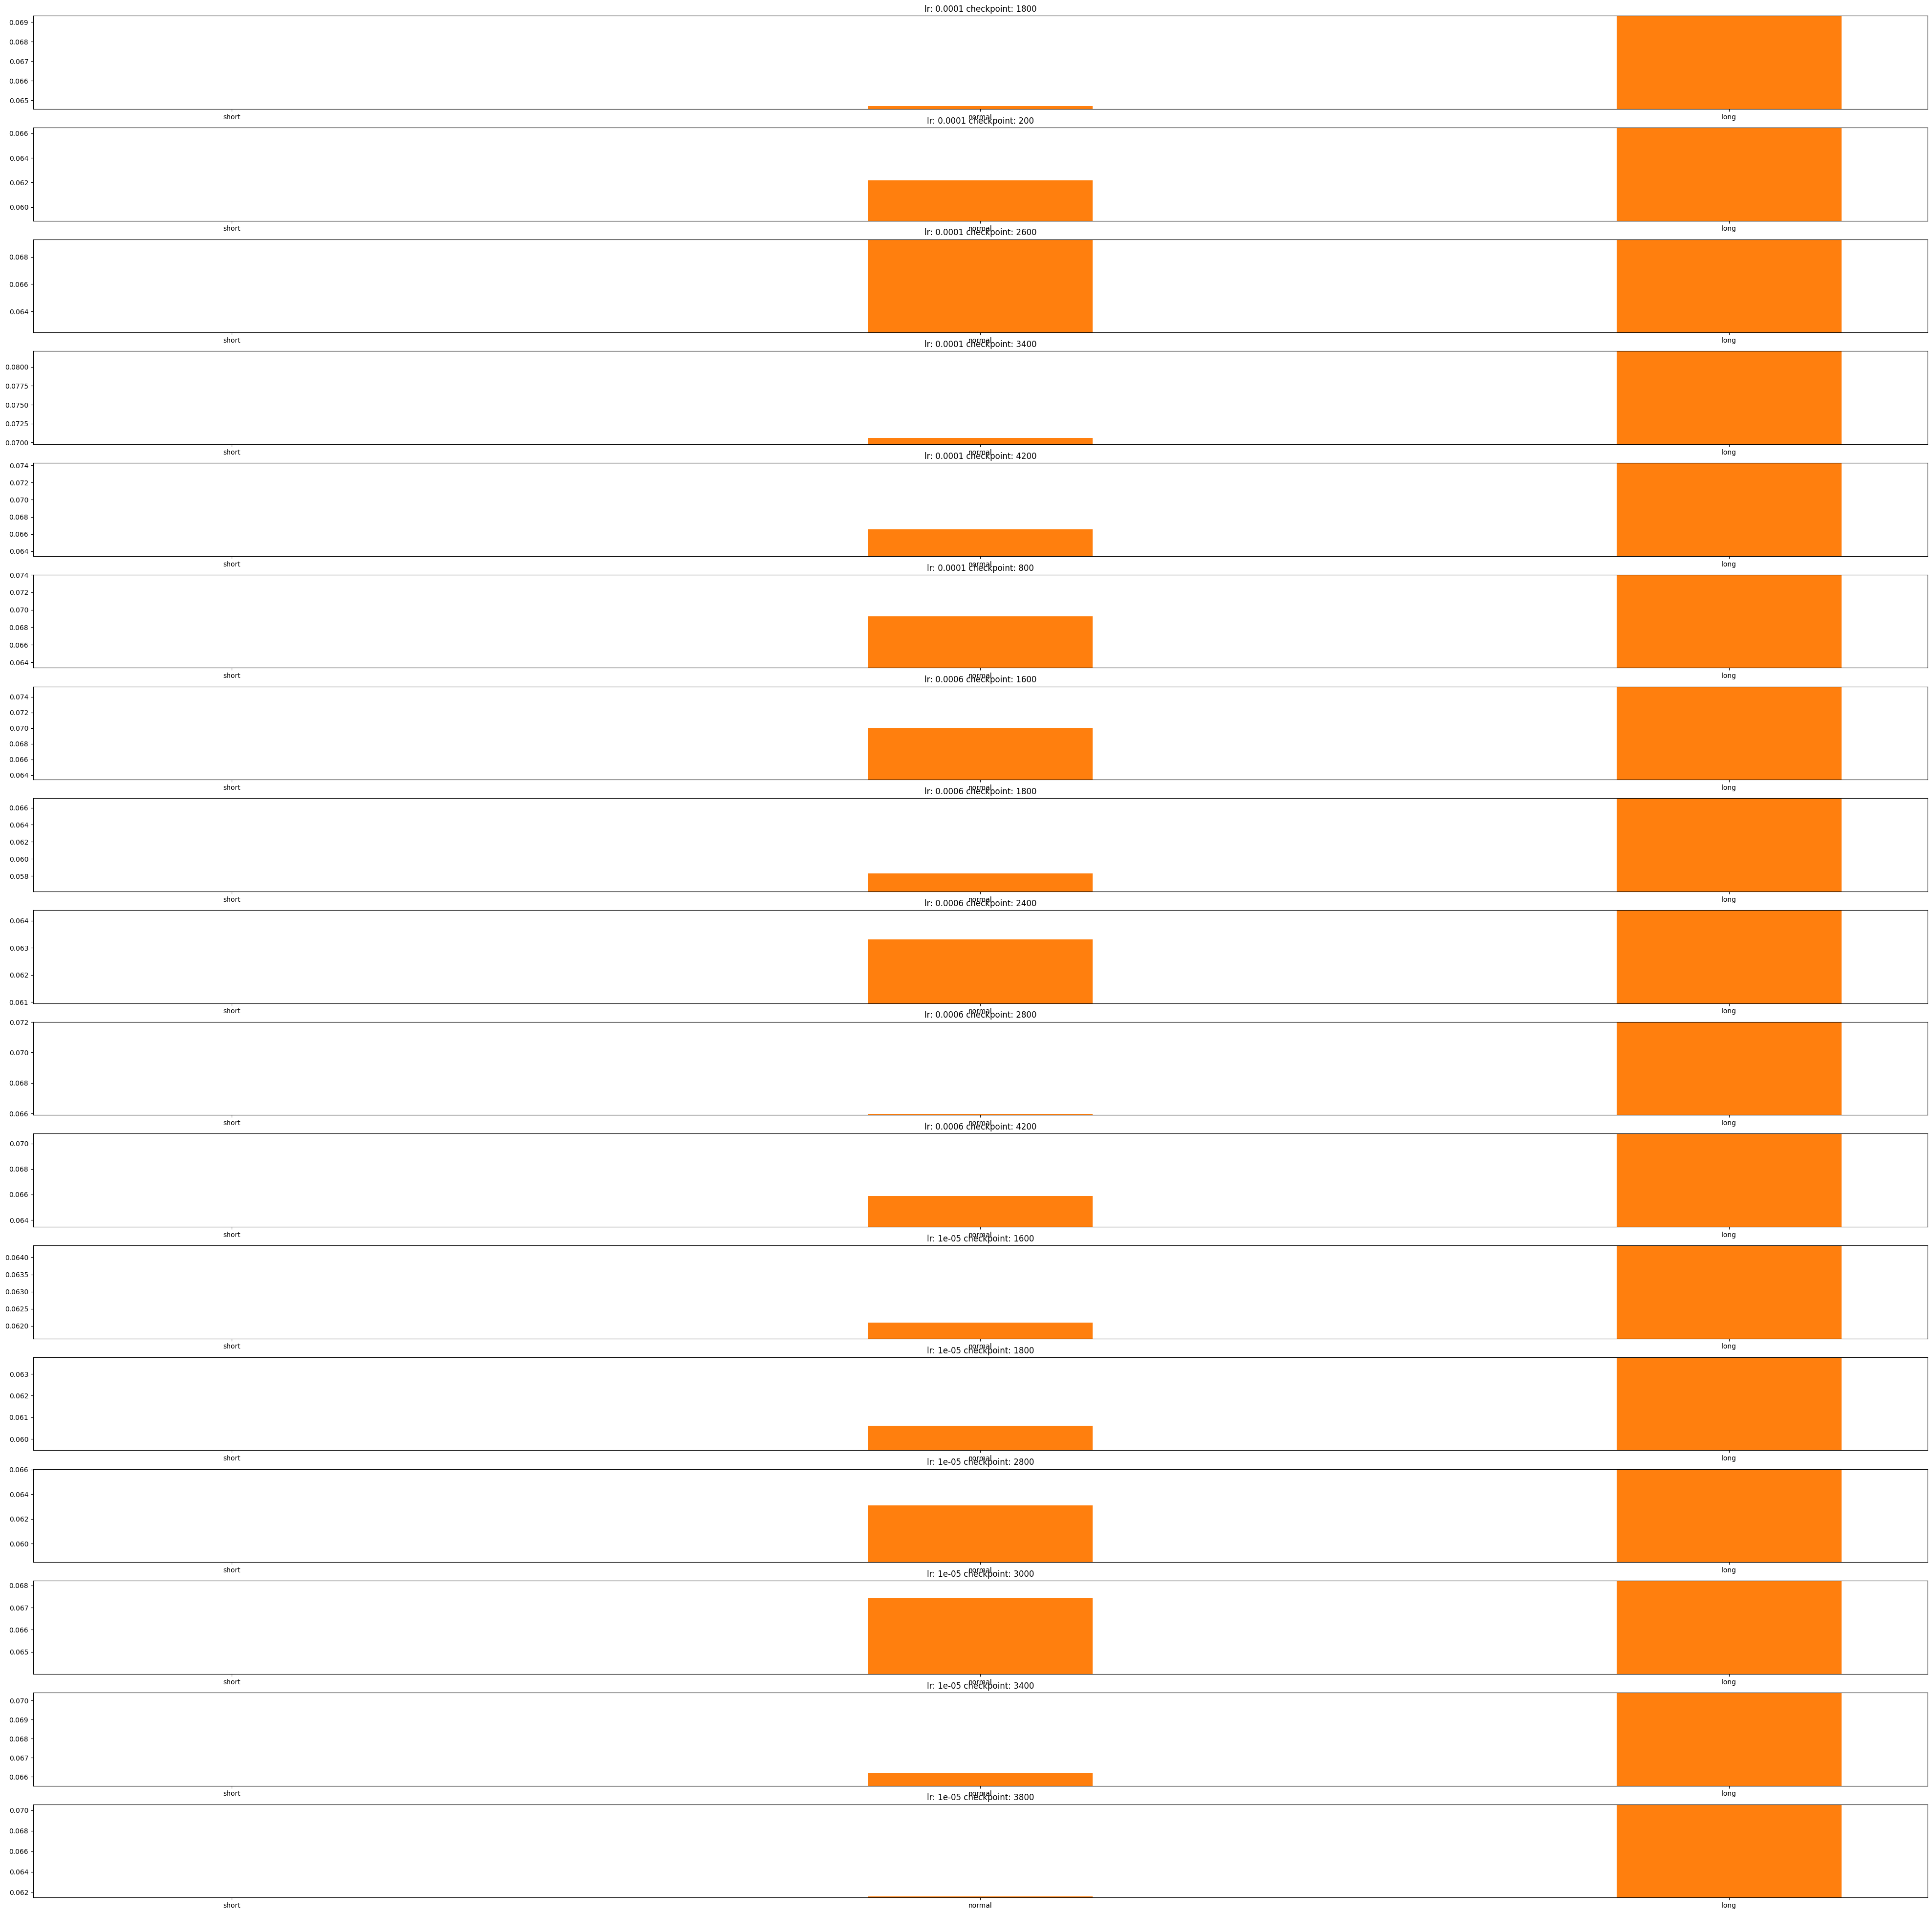

In [28]:
#extractiveness 
#0.0006 2600
#1e-05 2400
#0.0006 2600
#1e-05 2400
#higher f_score, higher extractiveness
fig = plt.figure(figsize = (50,50))
control_metric = 'prediction_compression_ratio'
reference_metric = 'reference_summary_ratio'


xs = []
ys = []
config = []
for index, res in enumerate(len_results):
    name, lr, checkpoint, result = res
    x = []
    y = []
    for index,control_value in enumerate(['short','normal','long']):
        prediction_density = result['result'][control_value][control_metric]
        x.append(control_value)
        y.append(prediction_density)
    if is_strictly_increasing(y):
        xs.append(x)
        ys.append(y)
        config.append([name, lr, checkpoint, result])
num_bar_graph = len(xs)
print(num_bar_graph)
for index in range(num_bar_graph):
    fig.add_subplot(num_bar_graph, 1, index + 1)
    x = xs[index]
    y = ys[index]
    lr = config[index][1]
    checkpoint = config[index][2]
    print(lr, checkpoint)
    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))



        #check if y is ascending
        #if not skip

        #width of the bar graph

    plt.bar(x, y, width = 0.3)
    plt.ylim(min(y), max(y))

    plt.title(f"lr: {lr} checkpoint: {checkpoint}")


8
0.0001 1000
0.0001 1200
0.0001 1400
0.0001 200
0.0001 3400
0.0001 4200
1e-05 1200
1e-05 2000,

17
0.0001 1800
0.0001 200
0.0001 2600
0.0001 3400
0.0001 4200
0.0001 800
0.0006 1600
0.0006 1800
0.0006 2400
0.0006 2800
0.0006 4200
1e-05 1600
1e-05 1800
1e-05 2800
1e-05 3000
1e-05 3400
1e-05 3800

# TOPIC ANALYSIS


In [31]:
pprint.pprint(top_results[0][3])
pprint.pprint(top_results[0])

{'attribute': 'topic',
 'result': {'abs_gold_score': 0.9761029411764706,
            'abs_score': 0.4274407679738562,
            'relative_score': 0.5915543300653594}}
('/scratch/tathagato/non_packed_experiment_outputs/topic_topic_0.0001_checkpoint-1000_topic.json',
 0.0001,
 1000,
 {'attribute': 'topic',
  'result': {'abs_gold_score': 0.9761029411764706,
             'abs_score': 0.4274407679738562,
             'relative_score': 0.5915543300653594}})


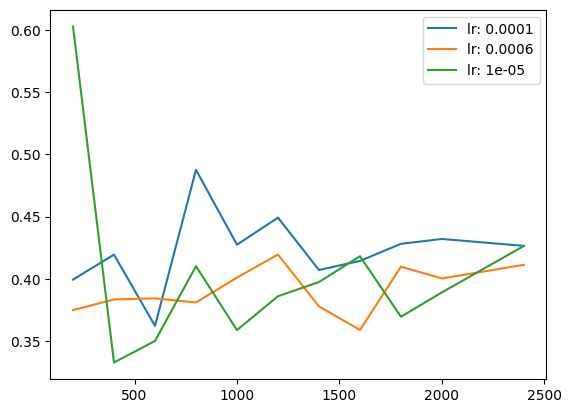

In [36]:
#first relative score
#group by learning rate 
#x axis is the checkpoint
#y axis is the relative score
#each line is a different learning rate
organised_data = {}
config = []
for index, res in enumerate(top_results):
    name, lr, checkpoint, result = res
    relative_score = result['result']['abs_score']
    if lr not in organised_data:
        organised_data[lr] = []
    organised_data[lr].append((checkpoint, relative_score))
for lr in organised_data.keys():
    organised_data[lr] = sorted(organised_data[lr], key = lambda x: x[0])
    x = [x[0] for x in organised_data[lr]]
    y = [x[1] for x in organised_data[lr]]
    plt.plot(x, y, label = f"lr: {lr}")
plt.legend()




In [40]:
#tabulate data where columns are name, lr, checkpoint, relative_score, abs score
#create pandas dataframe
data = []
for index, res in enumerate(top_results):
    name, lr, checkpoint, result = res
    relative_score = result['result']['relative_score']
    abs_score = result['result']['abs_score']
    data.append([name, lr, checkpoint, relative_score, abs_score])
columns = ['name', 'lr', 'checkpoint', 'relative_score', 'abs_score']
df = pd.DataFrame(data, columns = columns)
#sort by ascending order of relative score
df = df.sort_values(by = 'relative_score', ascending = True)
print(df)
#save to csv
df.to_csv('top_results.csv', index = False)

                                                 name       lr  checkpoint  \
28  /scratch/tathagato/non_packed_experiment_outpu...  0.00001         200   
1   /scratch/tathagato/non_packed_experiment_outpu...  0.00010        1200   
25  /scratch/tathagato/non_packed_experiment_outpu...  0.00001        1600   
9   /scratch/tathagato/non_packed_experiment_outpu...  0.00010         800   
11  /scratch/tathagato/non_packed_experiment_outpu...  0.00060        1000   
0   /scratch/tathagato/non_packed_experiment_outpu...  0.00010        1000   
5   /scratch/tathagato/non_packed_experiment_outpu...  0.00010        2000   
19  /scratch/tathagato/non_packed_experiment_outpu...  0.00060         600   
32  /scratch/tathagato/non_packed_experiment_outpu...  0.00001        2400   
27  /scratch/tathagato/non_packed_experiment_outpu...  0.00001        2000   
7   /scratch/tathagato/non_packed_experiment_outpu...  0.00010         400   
10  /scratch/tathagato/non_packed_experiment_outpu...  0.00010  

In [41]:
#SPECIFICITY ANALYSIS
#first relative score
pprint.pprint(spec_results[0][3])


{'attribute': 'specificity',
 'result': {'high': {'cer': 0.6990206400404066,
                     'gold_specificity': 5.115383597883596,
                     'prediction_specificity': 5.167453703703701},
            'normal': {'cer': 0.5406542822842699,
                       'gold_specificity': 4.7013128169663405,
                       'prediction_specificity': 4.686707838285957},
            'overall_cer': 0.561236191595537,
            'overall_gold_specificity': 4.75512707008194,
            'overall_prediction_specificity': 4.749187445343864}}
